<div dir="rtl" align="center">


<h3>
In the name of GOD
</h3>

<h1>
Linear Algebra Final Project
</h1>

<h3>
Dr. HR. Rabiee, M. Ramezani
</h3>

</div>

<div dir="ltr">

<h1>
Student Name: AmirMahdi Daraei
</h1>

</div>

<div dir="ltr" style="font-size:18px">
    In face recognition algorithms, they sought to recognize specific characteristics of the photos within the photos. For example, eyes, nose and...
      which could indicate the presence of a face in the photo. It is clear that such methods are expensive and in many cases imprecise.
    <br/>
    <br/>In this project, we are looking to implement a method that performs this diagnosis in a different way.
     In this method, like the previous method, we seek to find the characteristics that recognize a face, but we want to implement these characteristics in a different way.
</div>

## Load Data (10 points)

<br/>

<div dir="ltr" style="font-size:18px">
    Before we talk about the implementation of this algorithm, we need to have the data we will use.
    The desired data is placed in the corresponding zip along with this notebook.
    <br/>
    Please note that this dataset contains images of 200 people's faces.
    Each person has two photos, one normal and one smiling.
    So we have 400 photos in total.
    First, load all the photos and have them as you will need them later.
    <br/>
    <br/>
    Finally, to make sure you loaded the data correctly,
    Randomly display 5 of these faces in two smiling and normal states. For this, you can use the imshow function from the matplotlib library.
    <br/>
</div>

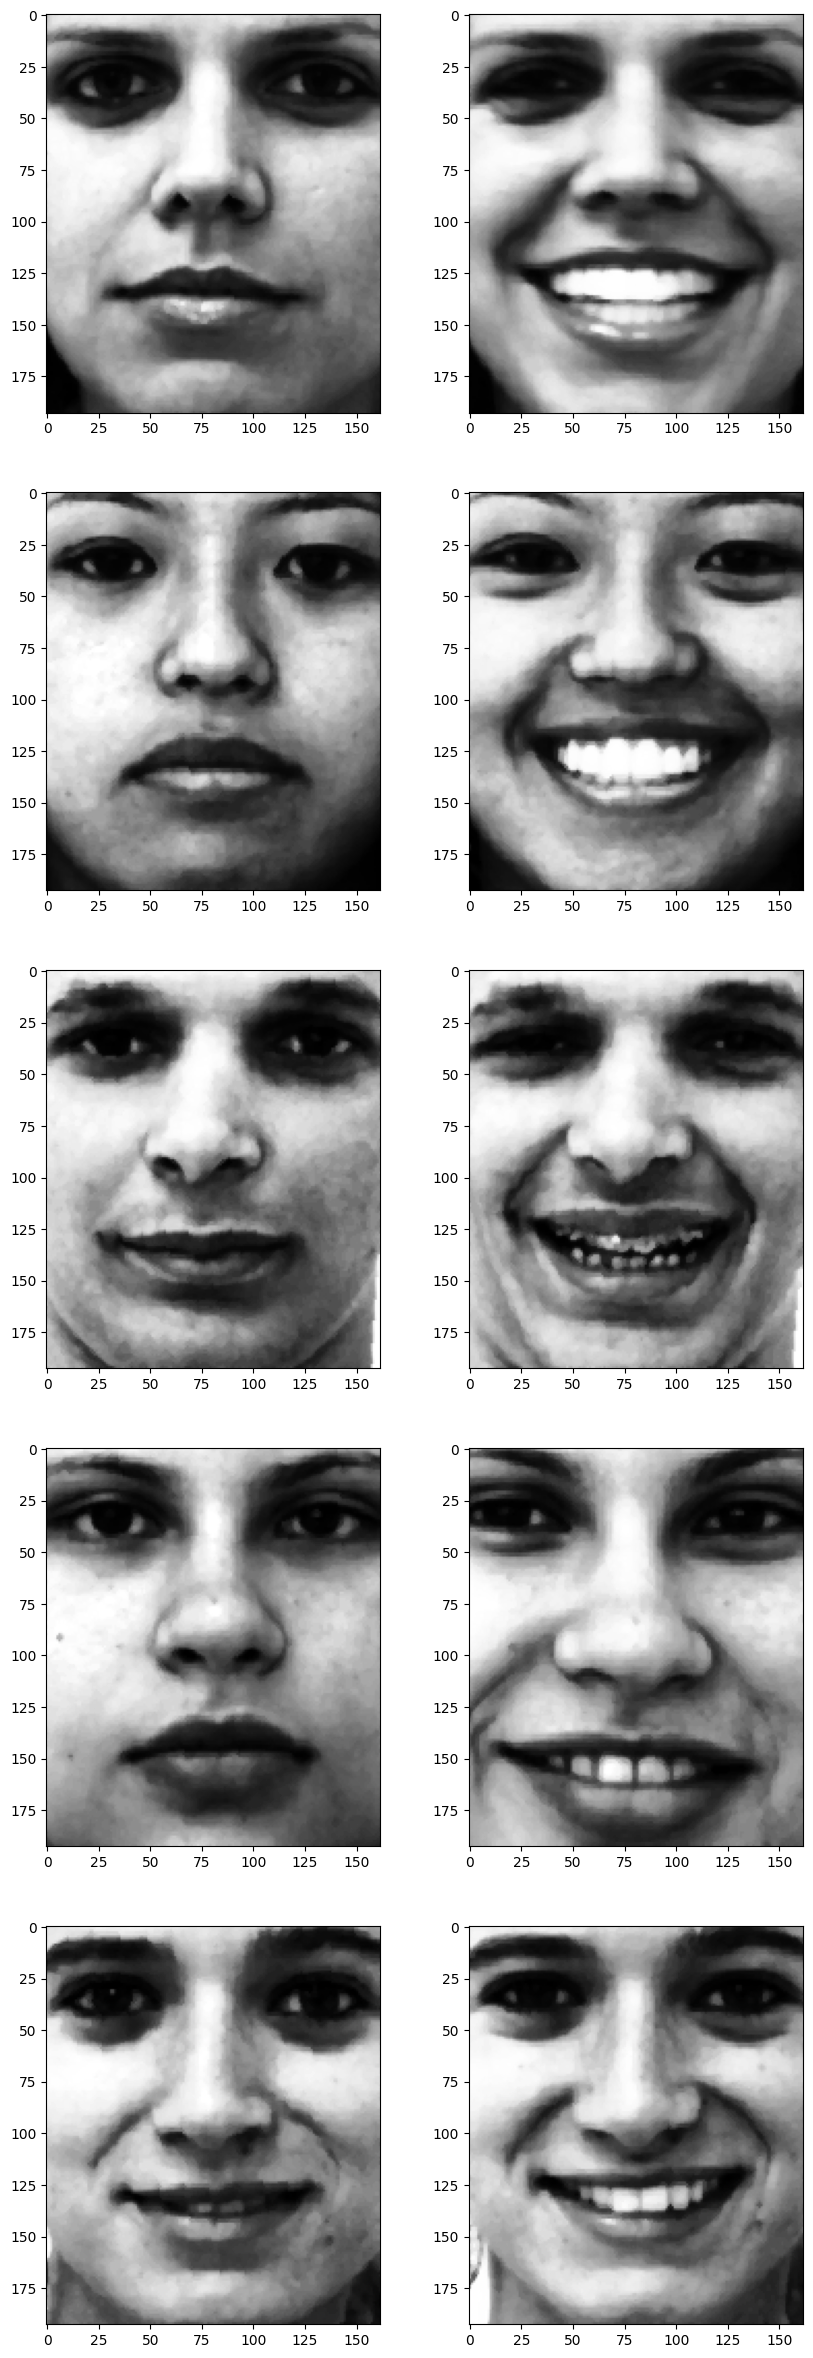

In [90]:
import matplotlib.pyplot as plt
import random

directory = "data/"
img_a = []
img_b = []
for i in range(1, 201):
    img = plt.imread(directory + str(i) + "a.jpg")
    img_a.append(img)
    img = plt.imread(directory + str(i) + "b.jpg")
    img_b.append(img)
    
random_indices = random.sample(range(1, 201), 5)

fig = plt.figure(figsize=(10, 30))
counter = 0
for index in random_indices:
    fig.add_subplot(5, 2, 2 * counter + 1)
    plt.imshow(img_a[index], cmap='gray', vmin=0, vmax=255)
    fig.add_subplot(5, 2, 2 * counter + 2)
    plt.imshow(img_b[index], cmap='gray', vmin=0, vmax=255)
    counter += 1
plt.show()

<br/>
<div dir="ltr" style="font-size:18px">
For now, we only work with natural face photos.
     Consider the first 190 photos of it
      Convert each to a one-dimensional vector $\Gamma_i$.
      Finally, the resulting matrix of the data is $\Gamma$
     form Pay attention that the $i$th column of this matrix
     is $\Gamma_i$.
     <br/>
<div/>

In [92]:
gamma_v = []

for i in range(OBSERVATION := 190):
    gamma_v.append(img_a[i].flatten())
    
gamma_v = np.array(gamma_v).T
print(gamma_v)

[[254  65 129 ...  58  96 178]
 [252  52 104 ...  20  96 178]
 [252  32  95 ...  19  96 185]
 ...
 [ 65   0  53 ...   1   3 100]
 [ 70   0  53 ...   1   3 106]
 [ 70   0  55 ...   1   3 100]]


# PCA
<br/>
<br/>

<div dir="ltr" style="font-size:18px">
 <br/>
    The Principal Component Analysis algorithm or PCA is a method to reduce the dimensions of the desired data, which is widely used in the field of machine learning and data science.
By reducing the dimensions, it increases the simplicity and at the same time, as expected, the input will be accompanied by a decrease in accuracy. In the PCA algorithm, we try to lose the least amount of information while reducing the dimensions.
    It is suggested to study more about this algorithm before doing the project.
<br/>
    <br/>
In the following sections, we want to implement PCA.
We said that in order to recognize faces, we are looking for specific features in each photo. These features may be a combination of multiple features within the image, or even single features
    be that we are not able to recognize them naturally.
    Here we are trying to find such features using PCA algorithm.
    <br/>
    <br/>
With PCA, we are going to do the following:
    <br/>
    <br/>
Suppose each photo is a two-dimensional $N\times M$ array, so each photo can be represented by a $N\times M$ length vector, so it is located in a $N\times M$ dimensional space. . Suppose $W$ is the space where all the face photos are located, call it Face Space. Here we seek to find K orthogonal vectors that span the space $W$.
    <div/>

## Mean image (5 points)

<div dir="rtl" style="font-size:18px">
    
<div/>

<div dir="ltr" style="font-size:18px">
     In this part to normalize need to
     mean image
     we have.
     Get it and display its image.
     $$
     \Psi = \frac{1}{n}\sum_{i = 1}^{n} \Gamma_i
     $$
      Here $n$ is the number of your data.
      Please note that our entire work is currently based on 190 photos of natural faces.
<div/>

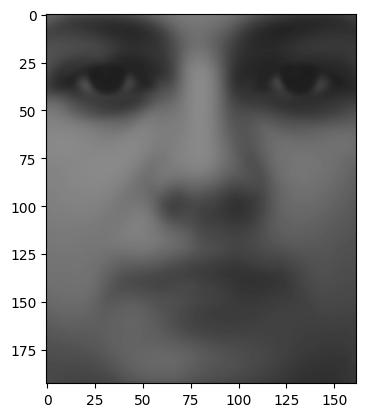

In [111]:
mean_vector = np.mean(gamma_v, axis=1)
alpha = np.reshape(mean_vector, newshape=(193, 162))

plt.imshow(alpha, cmap='gray', vmin=-63, vmax=511)
plt.show()

## Cov Matrix (15 points)

<div dir="rtl" style="font-size:18px">
    
<div/>

<div dir="ltr" style="font-size:18px">
    In this section, you must define the covariance matrix as follows:
    <br/>
    $$
    \Phi_i = \Gamma_i - \Psi
    $$
    <br/>
    $$
    A = [ \Phi_1 \Phi_2 \dots \Phi_n ]
    $$
    <br/>
    $$
    C = A A^T
    $$
    <br/>
    Now, the eigenvectors of the matrix $C$ are the Principal Components we want in order of the magnitude of their corresponding eigenvalues.
    <br/>
    Note that the matrix $C$ is the matrix $(N \times M)\times (N \times M)$, try to implement an optimal method to find its eigenvector.
    As a guide from
    $A^T A$
    get help
    <br/>
    Sort the values ​​of these eigenvalues ​​and show them in a graph.
    <br/>
    After sorting the eigenvalues, draw the eigenvector corresponding to the first 5 eigenvalues.
    These special vectors are called eigenfaces.
    <br/>
     Finally, with a little study, choose the criteria and the required number of Principal Components
     specify in your opinion and select that number of special vectors.
     Consider this number as K.
     Also, consider U as the matrix containing PCs.
    <br/>
<div/>

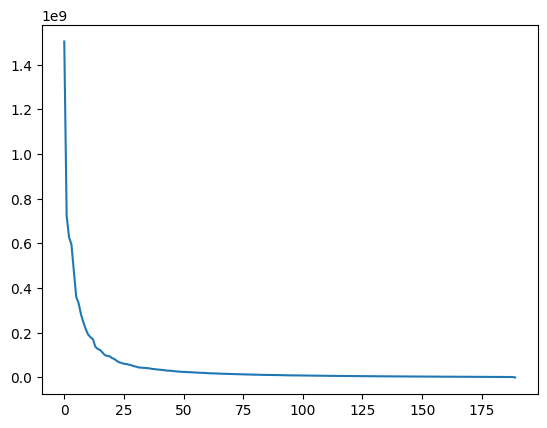

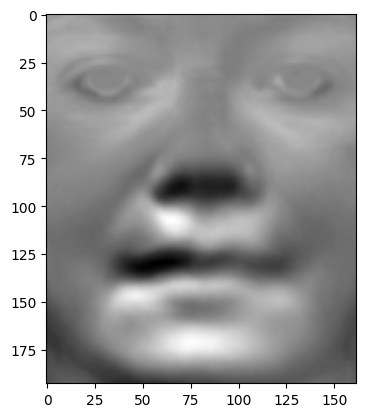

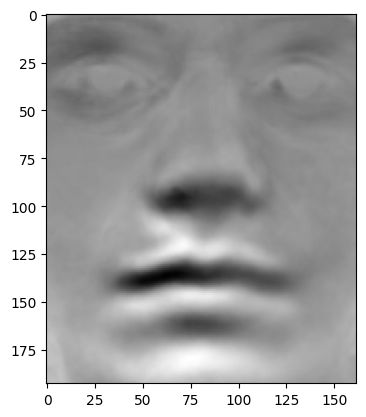

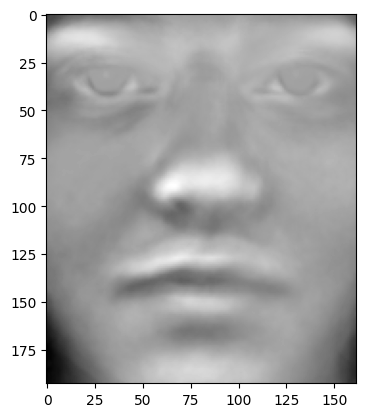

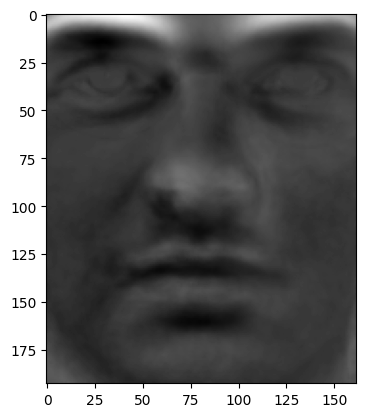

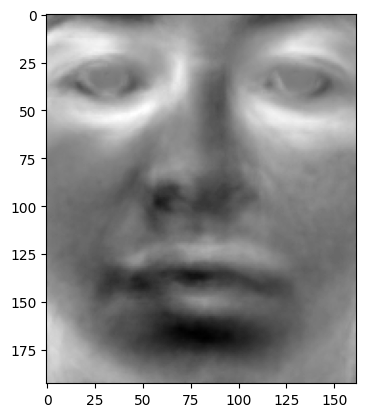

[[ 0.00261425  0.00380421 -0.01814211  0.01394833 -0.00028486]
 [ 0.00331348  0.00339917 -0.01760346  0.01575688 -0.00026461]
 [ 0.0030387   0.00315093 -0.01718354  0.01791681 -0.00015804]
 ...
 [-0.00538348  0.00339339 -0.02093603  0.0045998   0.00231425]
 [-0.00573898  0.00309779 -0.02090125  0.00432728  0.00167712]
 [-0.00611978  0.00264275 -0.02091623  0.00450585  0.0017401 ]]


In [112]:
phi = []
for i in range(OBSERVATION):
    phi.append(gamma_v[:, i] - mean_vector)

phi = np.array(phi).T
gram = np.matmul(phi.T, phi)
v, s_2, v_T = np.linalg.svd(gram)
indices = s_2.argsort()
v = v[indices[::-1]]

u = np.matmul(np.matmul(phi, v), np.linalg.inv(np.diag(np.sqrt(s_2))))
eigen_face = u[:, 0:5]

plt.plot(s_2)
fig = plt.figure()
plt.plot(np.sqrt(s_2)[indices[::-1]])

for i in range(5):
    plt.imshow(eigen_face[:, i].reshape((193, 162)), cmap="gray")
    plt.show()

print(eigen_face)

## Reconstruction images (20 points)

<div dir="ltr" style="font-size:18px">
     In this section, you are supposed to write a function that takes a photo
     Principal Components
     and restore it again with those PCs.
     For how to do this, take help from the following relationships.
     <br/>
     $$W = U^T(\Gamma - \Psi)$$
     $$rec = UW + \Psi$$
     <br/>
     Note that $\Gamma$
     Here is the entry photo.
<div/>

<div dir="rtl" style="font-size:18px">
    
<div/>

In [113]:
def reconstruct_image(orig, pcs):
    """
    A function to reconstruct the original image with the given PCs
    Arguments
    orig - Original image to perform reconstruction on
    pcs  - The principal components to use for the reconstruction
    
    Returns
    recon - The reconstruction of the orig from pcs
    mse   - The Mean Squared Error of the recon with orig
    """
    recon=None
    mse=None
    orig=orig.reshape((orig.size,1))
    W=pcs.T @ (orig-mean_vector)
    recon=pcs@(W)+mean_vector
    mse = ((orig-recon).T@(orig-recon))/orig.size
    return recon, mse[0][0]


<div dir="ltr" style="font-size:18px">
    (Part B)
    <br/>
    Now, randomly select one of the photos from the database that we have worked on so far (including 190 natural photos).
    Perform reconstruction for that image for all K selection modes.
    <br/>
    Obtain the minimum and maximum MSE.
    <br/>
    Calculate the MSE for the Ka you chose in the previous section.
    <br/>
    Then the chart
    MSE-number of largest principal components
    draw the
    <br/>
    In the next step, for another random photo from the dataset, the original photo along with the photos from the reconstruction taking into account
    5 different choices for K that total range of numbers
    cover the eigenfaces,
    draw
    <br/>
    Describe your results from the work you did in this section and from the obtained outputs.
<div/>

(31266, 190)
minimum mse is 1.1688547105905977e-25
maximum mse is 926.950567958341
mse for k = 48 is 249.43482693487627


Text(0.5, 1.0, 'rank = 48 MSE=232.01500719740713')

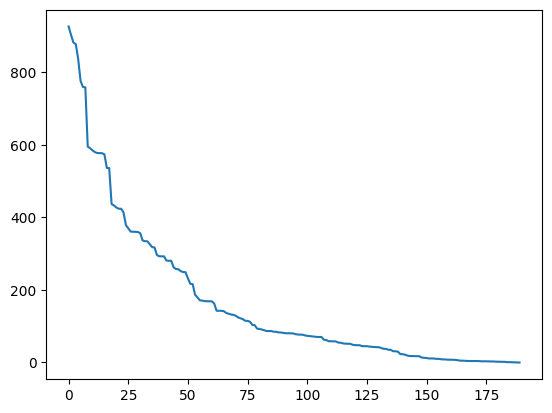

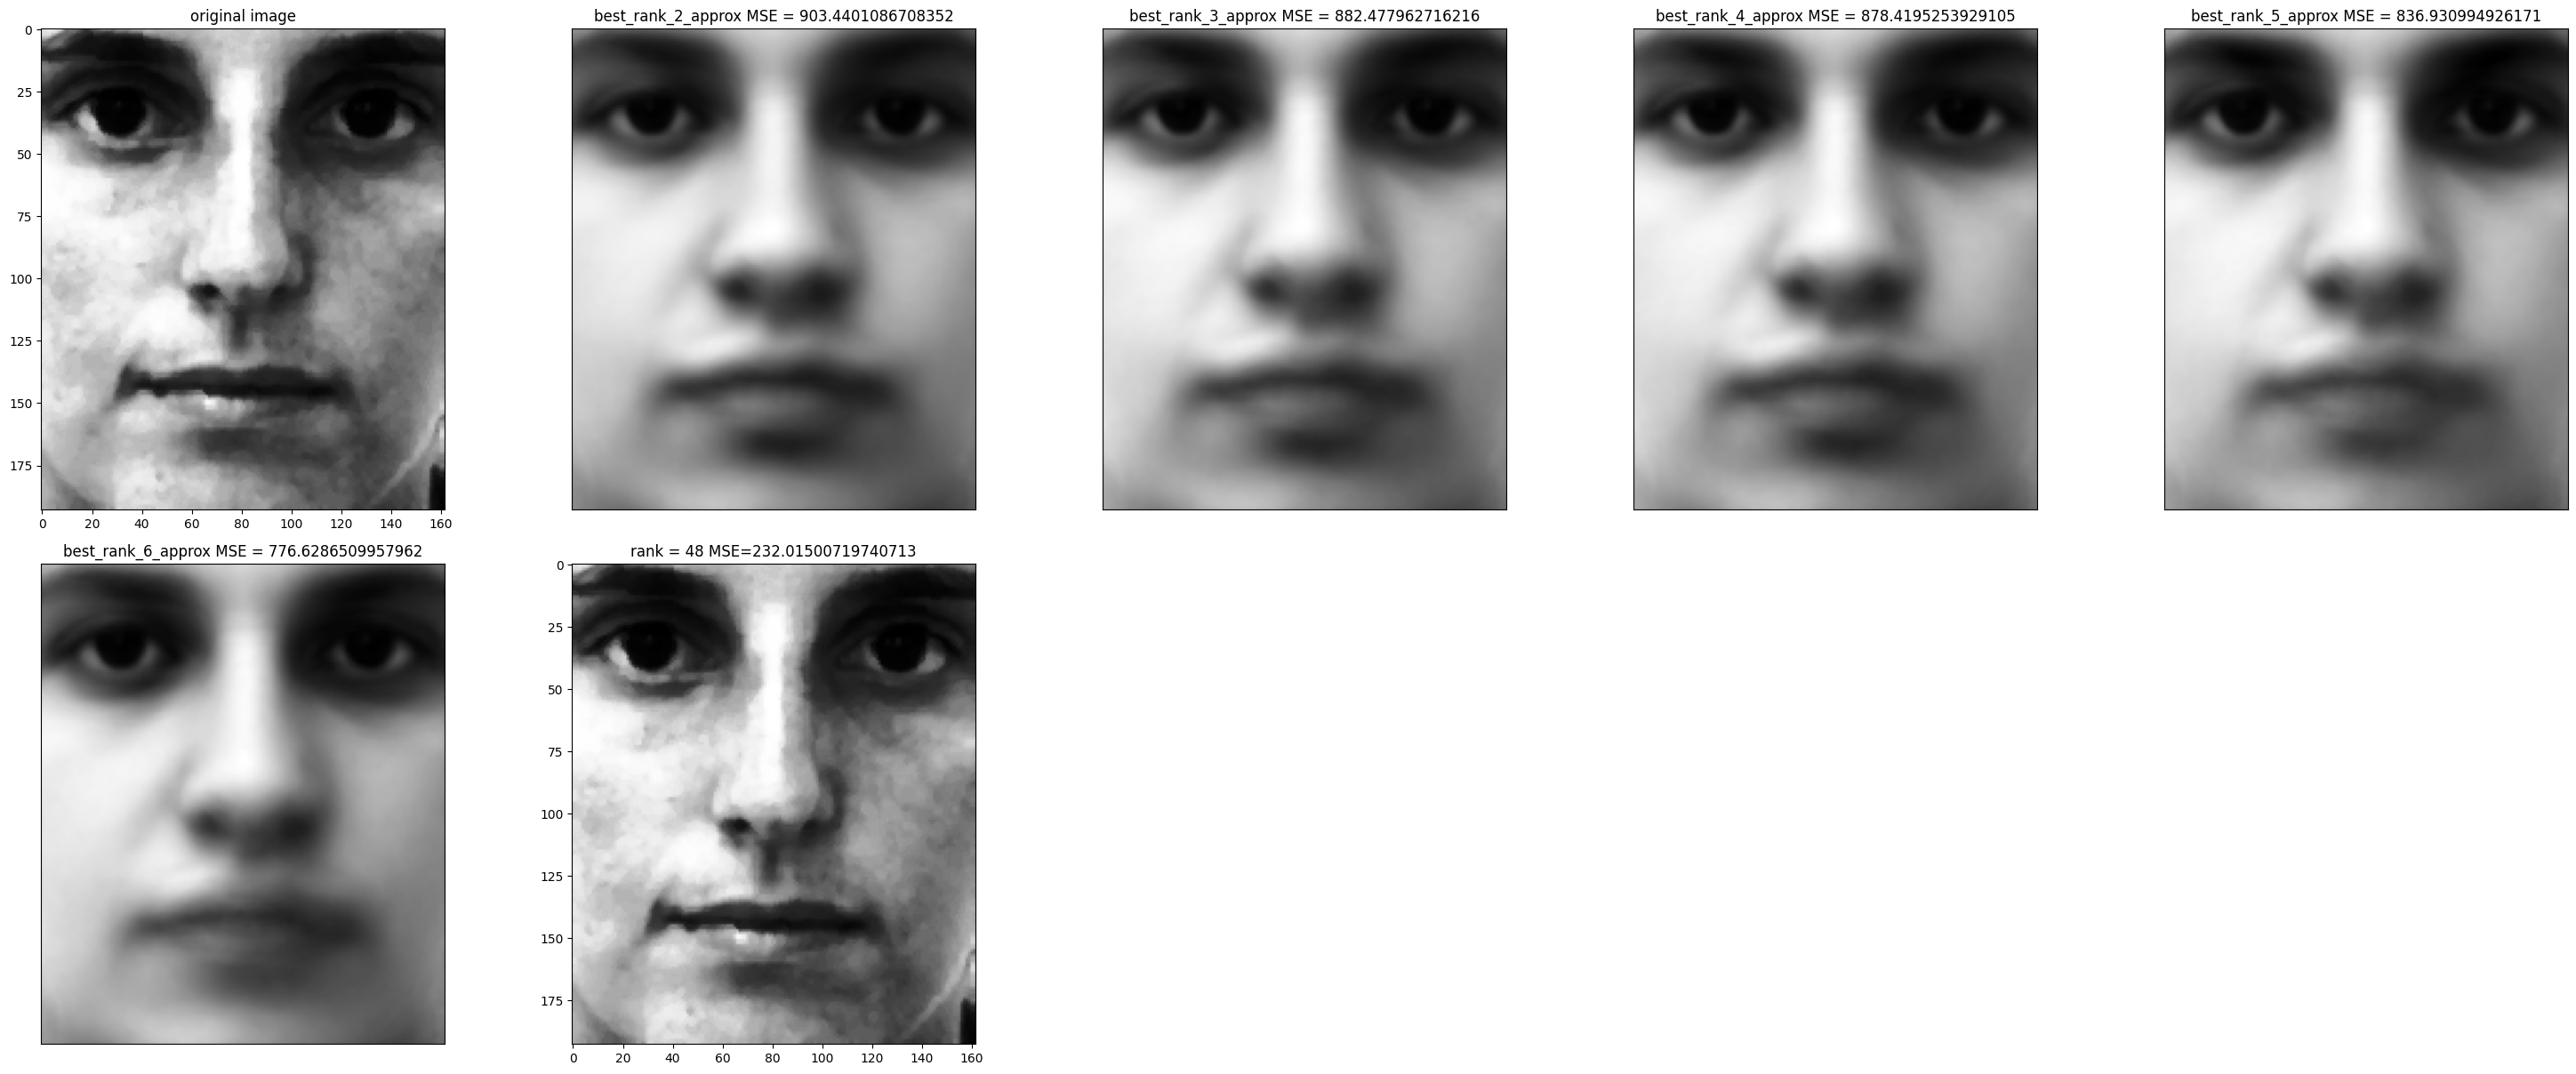

In [114]:
import random

img_num = random.randint(1, 191)
print(u.shape)
mse_list = []
mean_vector = mean_vector.reshape(mean_vector.size, 1)
for i in range(OBSERVATION):
    rec, mse = reconstruct_image(gamma_v[:, img_num], u[:, 0:i + 1])
    mse_list.append(mse)

print(f"minimum mse is {min(mse_list)}")
print(f"maximum mse is {max(mse_list)}")

rv = []
for i in range(1, 190):
    rv.append(mse_list[i] / max(mse_list) * i)

plt.plot(mse_list)
k = np.argmax(rv)
print(f"mse for k = {k} is {mse_list[k]}")

fig = plt.figure(figsize=(30, 30))
ax = plt.subplot(5, 5, 1)
ax.imshow(gamma_v[:, img_num].reshape((193, 162)), cmap="gray")
ax.set_title("original image")

for i in range(1, 6):
    ax = plt.subplot(5, 5, i + 1)
    rec, mse = reconstruct_image(gamma_v[:, img_num], u[:, 0:i + 1])
    ax.imshow(rec.reshape(193, 162), cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"best_rank_{i + 1}_approx MSE = {mse}")
    plt.tight_layout()

rec, mse = reconstruct_image(gamma_v[:, img_num], u[:, 0:51])
ax = plt.subplot(5, 5, 7)
ax.imshow(gamma_v[:, img_num].reshape((193, 162)), cmap="gray")
ax.set_title(f"rank = {k} MSE={mse}")

##  Smiling  images (10 points)

<div dir="ltr" style="font-size:18px">
     Now, this time, repeat all the work you did in the previous section (section B).
     But this time, instead of random photos of normal faces, choose random photos of smiling faces.
     Describe your results from the work you did in this section and from the obtained outputs.
     What do you think are the reasons for the differences in the outputs in each episode compared to the previous episode?
<div/>

(31266, 190)
(31266, 190)
[[250  55 225 ... 199  84 185]
 [252  48 163 ... 196  98 199]
 [252  49 152 ... 194  92 214]
 ...
 [ 70  85  62 ...  36  37 105]
 [ 76  85  65 ...  11  37 109]
 [ 78  60  59 ...   0  39 117]]


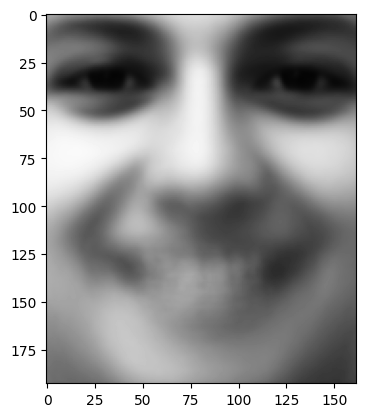

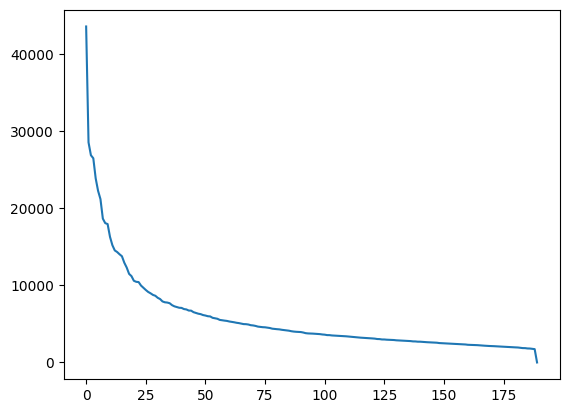

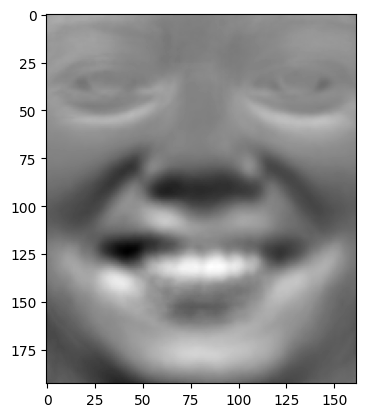

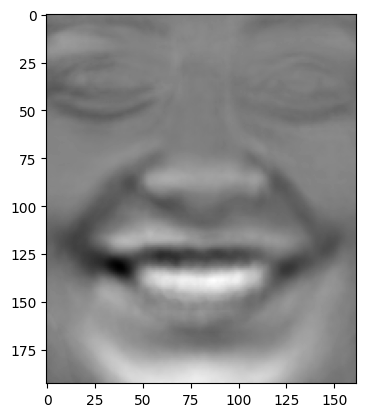

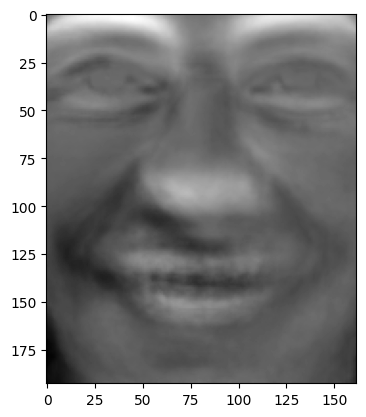

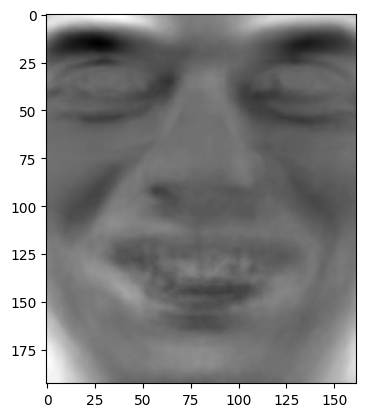

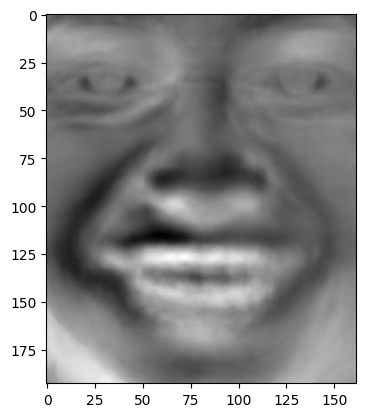

(31266, 190)
minimum mse is 7.89479184038506e-26
maximum mse is 1292.2671633774823
mse for k = 50 is 305.09058206877705


Text(0.5, 1.0, 'rank = 50 MSE=305.09058206877705')

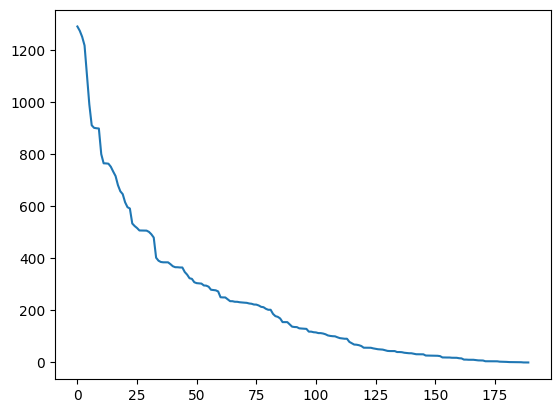

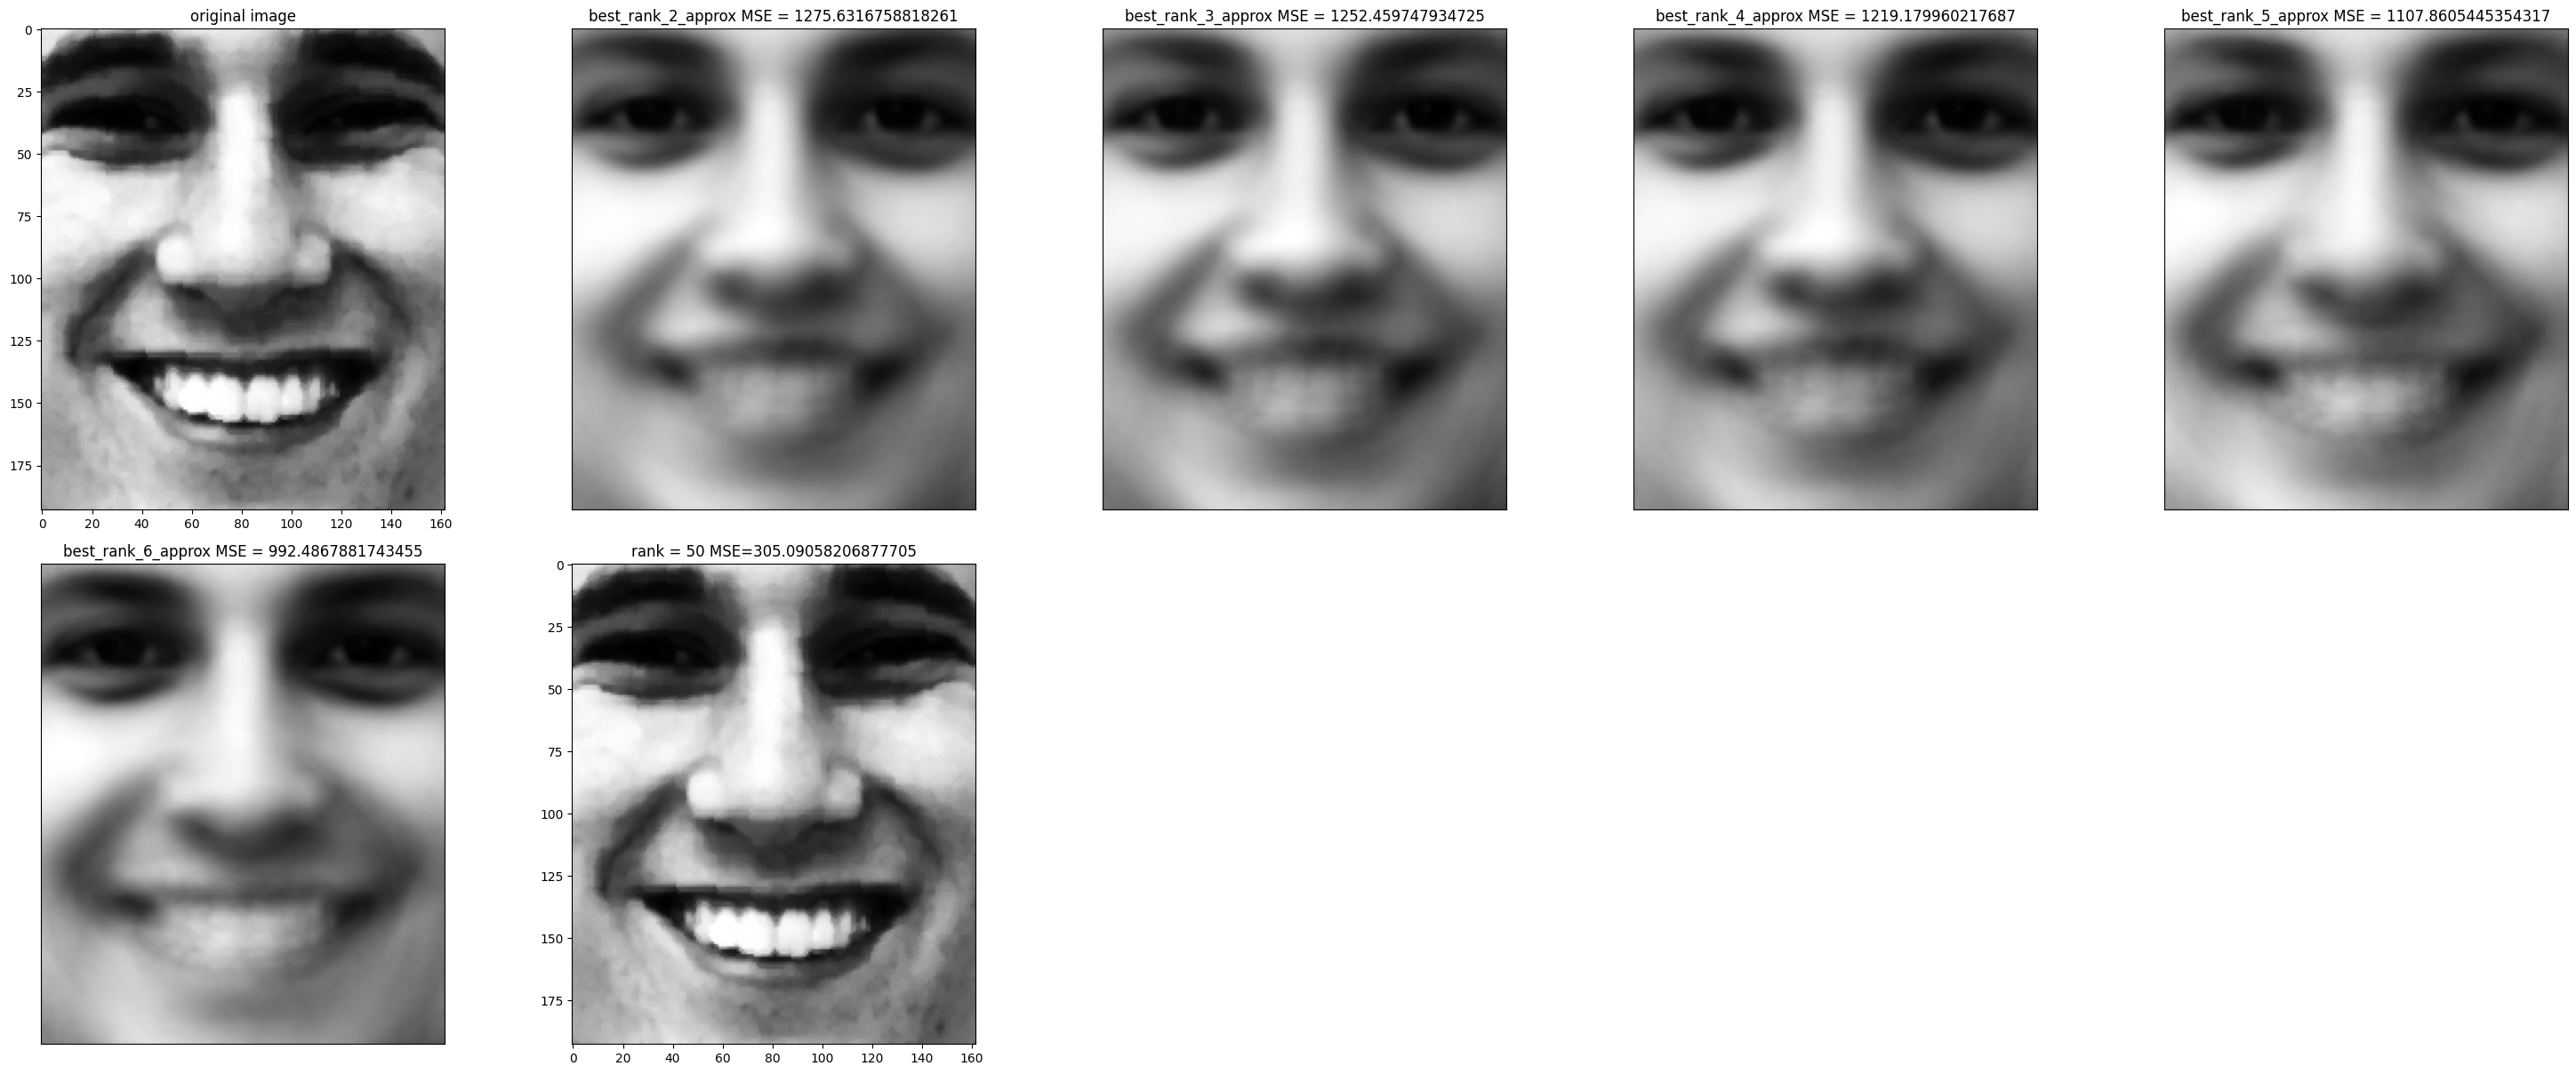

In [115]:
import random
img_num = random.randint(1, 191)
print(u.shape)
k = 50
mse_list = []

import numpy as np
gamma_l = []
for i in range(OBSERVATION):
    gamma_l.append(images_l[i].flatten())
gamma_l = np.array(gamma_l).T
print(gamma_l.shape)
print(gamma_l)

mean_vector = np.mean(gamma_l, axis=1)
alpha = np.reshape(mean_vector, newshape=(193, 162))
plt.imshow(alpha, cmap='gray', vmin=0, vmax=255)
plt.show()


phi = []
for i in range(OBSERVATION):
    phi.append(gamma_l[:, i] - mean_vector)
phi = np.array(phi).T
gram = np.matmul(phi.T, phi)
v, s_2, v_T = np.linalg.svd(gram)
indices = s_2.argsort()
v = v[indices[::-1]]

u = np.matmul(np.matmul(phi, v), np.linalg.inv(np.diag(np.sqrt(s_2))))
eigen_face = u[:, 0:5]
plt.plot(np.sqrt(s_2))
fig = plt.figure()

plt.plot(np.sqrt(s_2)[indices[::-1]])
for i in range(5):
    plt.imshow(eigen_face[:, i].reshape((193, 162)), cmap="gray")
    plt.show()


def reconstruct_image(orig, pcs):
    """
    A function to reconstruct the original image with the given PCs
    Arguments
    orig - Original image to perform reconstruction on
    pcs  - The principal components to use for the reconstruction
    
    Returns
    recon - The reconstruction of the orig from pcs
    mse   - The Mean Squared Error of the recon with orig
    """
    recon = None
    mse = None
    orig = orig.reshape((orig.size, 1))
    W = np.matmul(pcs.T, (orig - mean_vector))
    recon = np.matmul(pcs, W) + mean_vector
    mse = np.matmul((orig - recon).T, (orig - recon)) / orig.size
    return recon, mse[0][0]


import random
img_num = random.randint(1, 191)
print(u.shape)
k = 50
mse_list = []
mean_vector = mean_vector.reshape(mean_vector.size, 1)
for i in range(OBSERVATION):
    rec, mse = reconstruct_image(gamma_l[:, img_num], u[:, 0:i + 1])
    mse_list.append(mse)

print(f"minimum mse is {min(mse_list)}")
print(f"maximum mse is {max(mse_list)}")
print(f"mse for k = {k} is {mse_list[k]}")

plt.plot(mse_list)

fig = plt.figure(figsize=(30, 30))
ax = plt.subplot(5, 5, 1)
ax.imshow(gamma_l[:, img_num].reshape((193, 162)), cmap="gray")
ax.set_title("original image")

for i in range(1, 6):
    ax = plt.subplot(5, 5, i + 1)
    rec, mse = reconstruct_image(gamma_l[:, img_num], u[:, 0:i + 1])
    ax.imshow(rec.reshape(193, 162), cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"best_rank_{i + 1}_approx MSE = {mse}")
    plt.tight_layout()

rec, mse = reconstruct_image(gamma_l[:, img_num], u[:, 0:51])
ax = plt.subplot(5, 5, 7)
ax.imshow(gamma_l[:, img_num].reshape((193, 162)), cmap="gray")
ax.set_title(f"rank = 50 MSE={mse}")

The reason that smiling photos do not work well and have a high MSE is that we prepared our model based on photos without laughter, and naturally, this model cannot handle photos that are smiling well (especially near the location). (laughter and teeth) to characterize and reconstruct

## Reconstruction of test set (10 points)


<div dir="ltr" style="font-size:18px">
So far, by calculating the MSE and reconstructing the photos, we have reached a numerical and visual intuition of the accuracy of our new face space. But we cannot ignore the fact that our evaluations of the new space were done using the photos with which we created the face space. As a result, our evaluation is somehow biased. For a better evaluation, we perform MSE on a number of photos that the algorithm has not seen before and reconstruct them.
    <br/>
    In this part, select one of the 10 unseen photos of natural mode and implement the tasks of part B on it. What difference has the assessment made? draw a conclusion
    <br/>
<div/>

199
minimum mse is 155.94488989261356
maximum mse is 963.0330194142473
mse for k = 50 is 237.62546979293606


Text(0.5, 1.0, 'rank = 50 MSE=237.62546979293606')

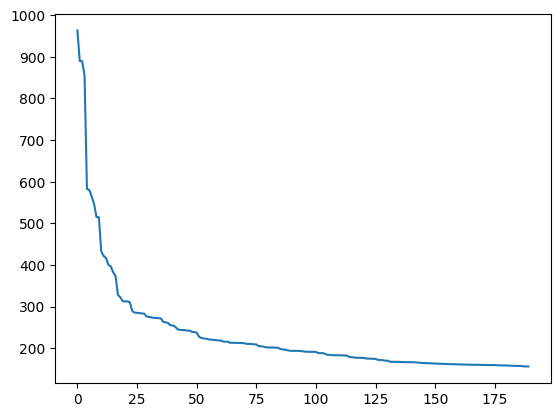

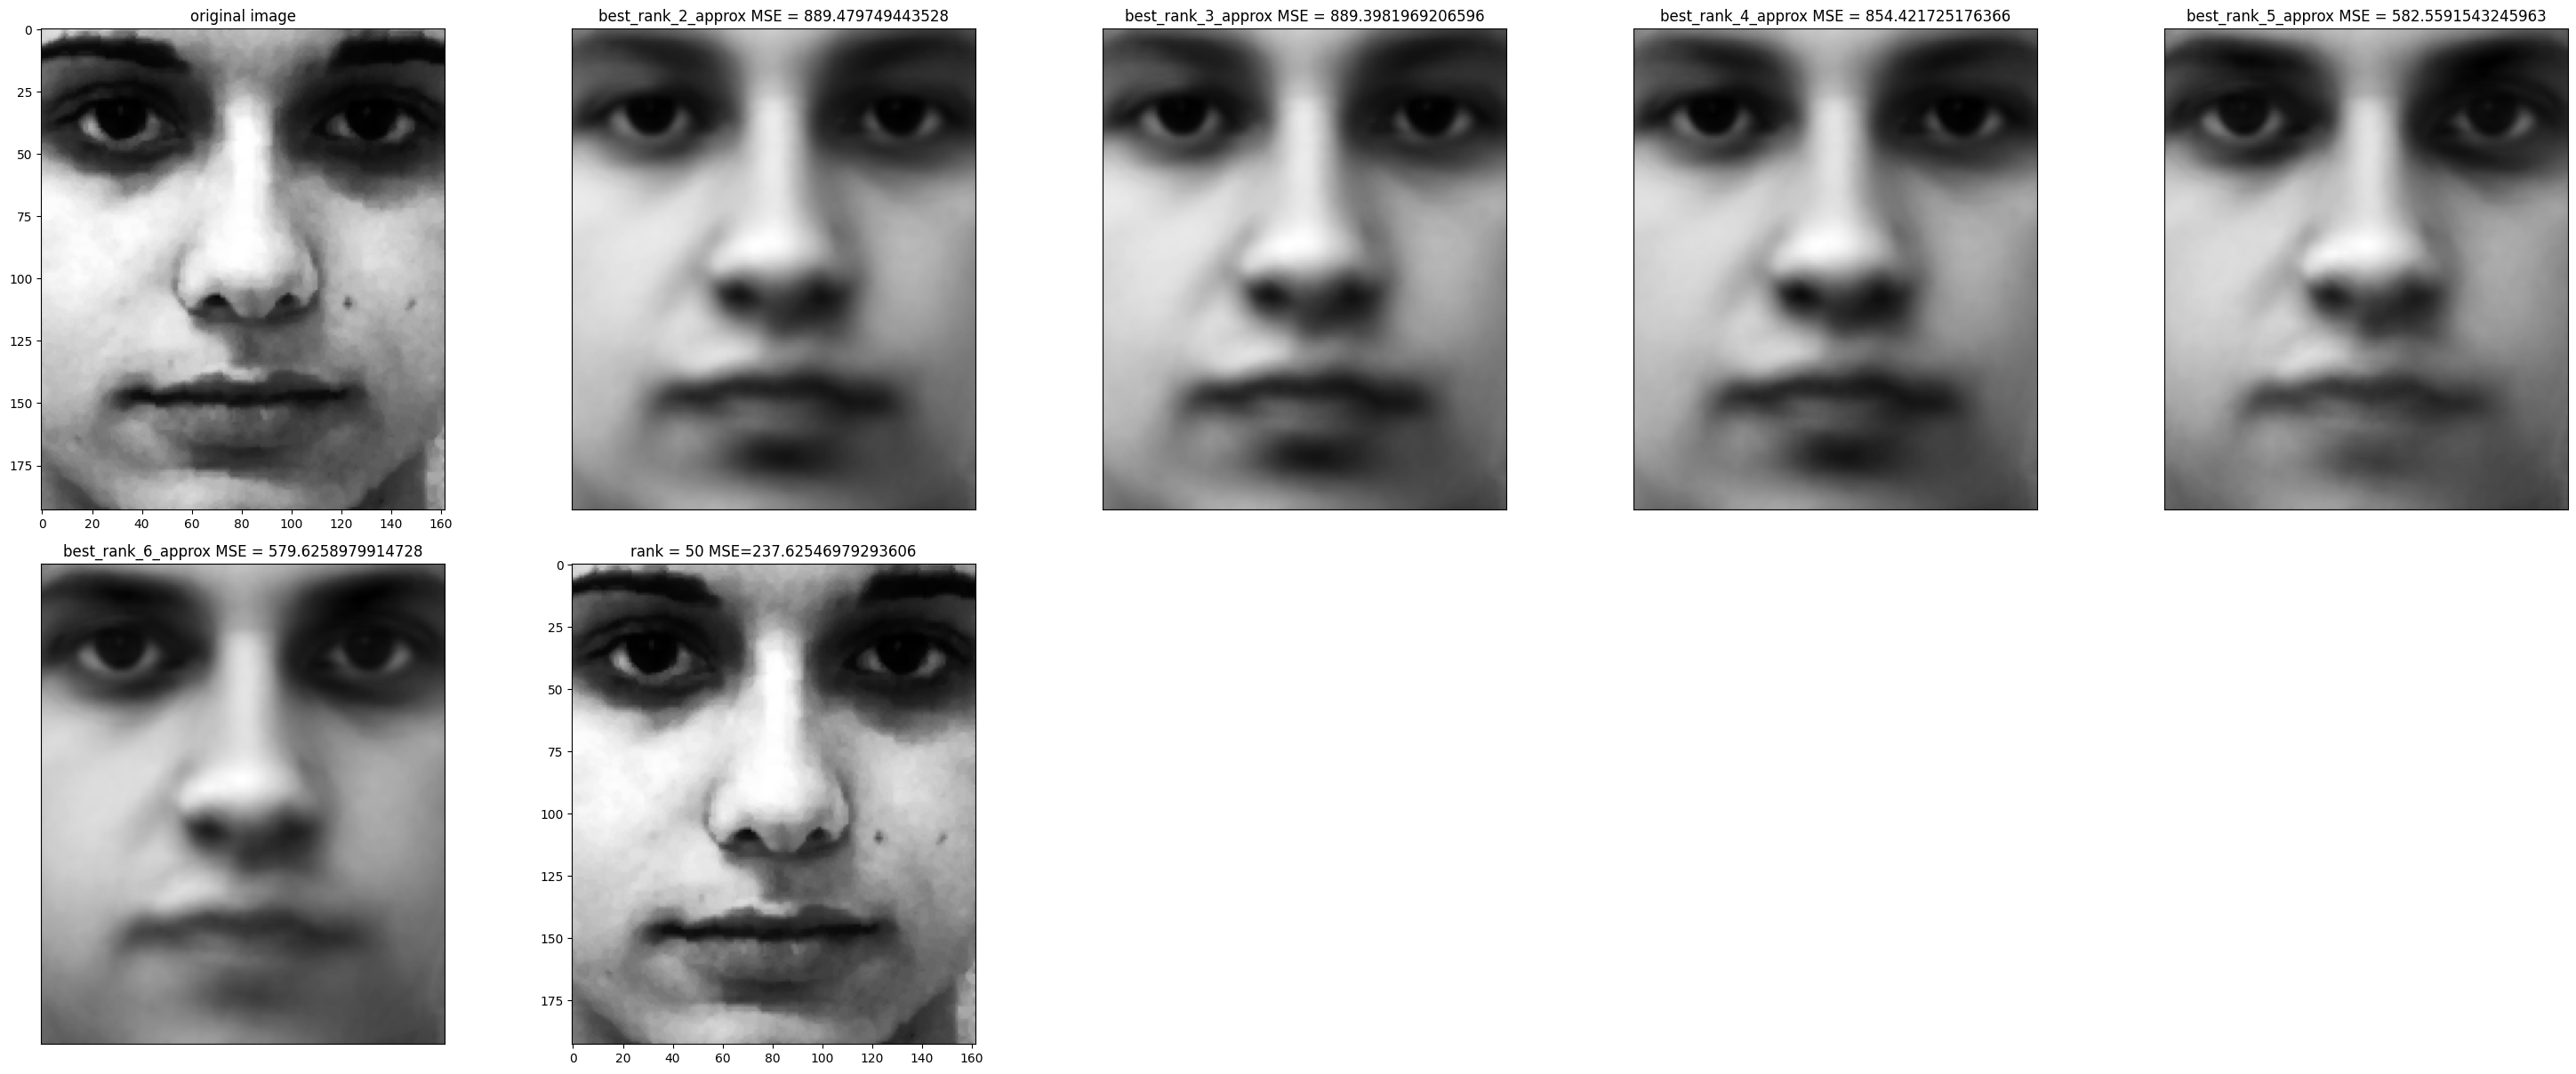

In [117]:
mean_vector = np.mean(gamma_v, axis=1)
alpha = np.reshape(mean_vector, newshape=(193, 162))
phi = []
for i in range(OBSERVATION):
    phi.append(gamma_v[:, i] - mean_vector)
phi = np.array(phi).T
gram = np.matmul(phi.T, phi)
v, s_2, v_T = np.linalg.svd(gram)
indices = s_2.argsort()
v = v[indices[::-1]]

u = np.matmul(np.matmul(phi, v), np.linalg.inv(np.diag(np.sqrt(s_2))))
eigen_face = u[:, 0:5]


def reconstruct_image(orig, pcs):
    """
    A function to reconstruct the original image with the given PCs
    Arguments
    orig - Original image to perform reconstruction on
    pcs  - The principal components to use for the reconstruction
    
    Returns
    recon - The reconstruction of the orig from pcs
    mse   - The Mean Squared Error of the recon with orig
    """
    recon = None
    mse = None
    orig = orig.reshape((orig.size, 1))
    W = np.matmul(pcs.T, (orig - mean_vector))
    recon = np.matmul(pcs, W) + mean_vector
    mse = np.matmul((orig - recon).T, (orig - recon)) / orig.size
    return recon, mse[0][0]


import random
img_num = random.randint(191, 201)
print(img_num)
k = 50
mse_list = []
mean_vector = mean_vector.reshape(mean_vector.size, 1)
for i in range(OBSERVATION):
    rec, mse = reconstruct_image(images_n[img_num].flatten(), u[:, 0:i + 1])
    mse_list.append(mse)

print(f"minimum mse is {min(mse_list)}")
print(f"maximum mse is {max(mse_list)}")
print(f"mse for k = {k} is {mse_list[k]}")

plt.plot(mse_list)

fig = plt.figure(figsize=(30, 30))
ax = plt.subplot(5, 5, 1)
ax.imshow(images_n[img_num].flatten().reshape((193, 162)), cmap="gray")
ax.set_title("original image")

for i in range(1, 6):
    ax = plt.subplot(5, 5, i + 1)
    rec, mse = reconstruct_image(images_n[img_num].flatten(), u[:, 0:i + 1])
    ax.imshow(rec.reshape(193, 162), cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"best_rank_{i + 1}_approx MSE = {mse}")
    plt.tight_layout()

rec, mse = reconstruct_image(images_n[img_num].flatten(), u[:, 0:51])
ax = plt.subplot(5, 5, 7)
ax.imshow(images_n[img_num].flatten().reshape((193, 162)), cmap="gray")
ax.set_title(f"rank = 50 MSE={mse}")

## Reconstruction of non-human image (10 points)

<div dir="ltr" style="font-size:18px">
Consider two photos other than the human face of your choice (such as a photo of a car or a bird).
     First, perform the necessary operations such as black and white or resizing.
     Then using all PCs
     Try to reconstruct it and calculate the MSE.
     <br/>
     Did the algorithm work as well as the photos of the faces? Why? draw a conclusion
     <br/>
<div/>

MSE : 4431.212437081707
MSE : 4933.436437800736


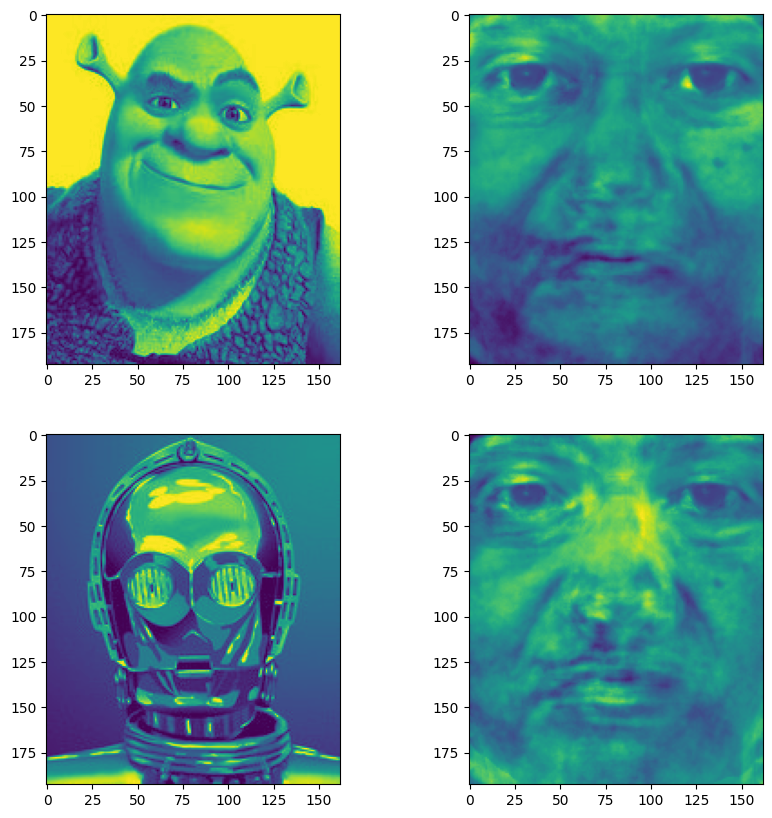

In [125]:
fig = plt.figure(figsize=(10, 10))

img = plt.imread("data/shrek.jpg")
ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(img)
rec, mse = reconstruct_image(img, u[:, 0:60])
ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(rec.reshape(193, 162))
print(f"MSE : {mse}")

img = plt.imread("data/robot.jpg")
ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(img)
rec, mse = reconstruct_image(img, u[:, 0:60])
ax4 = fig.add_subplot(2, 2, 4)
ax4.imshow(rec.reshape(193, 162))
print(f"MSE : {mse}")

# The model doesn't work because we trained it based on human faces
# It can not predict robots or caricatures easily

## Image Rotation (10 points)

<div dir="ltr" style="font-size:18px">
    Now, randomly select one of the photos from the dataset that we have worked on so far (including 190 natural photos). For that photo, all possible rotations
    (from 0 to 360).
    Now perform reconstruction and MSE calculation on each of the obtained photos using all PCs.
    <br/>
    Plot the MSE versus degree of rotation.
    <br/>
    For 10 degrees uniformly between 360 and 0, draw the original image, the image after the epoch, the reconstructed image with the help of the algorithm.
    <br/>
    Analyze the results obtained. Is the MSE in the 360 ​​degree rotation mode equal to the 0 mode?
    Why?
    <br/>
    <br/>
    <font color=blue>
    You can rotate your photos using ndimage.
        <font/>
        <br/>
<div/>

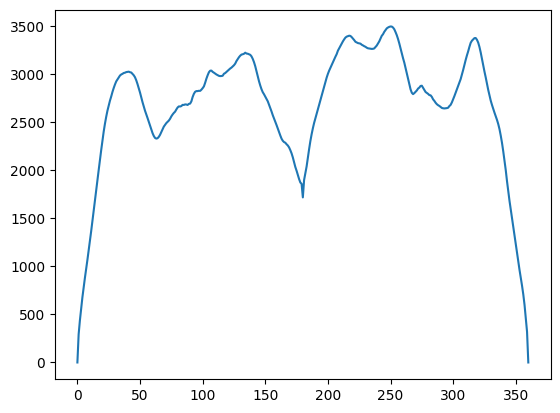

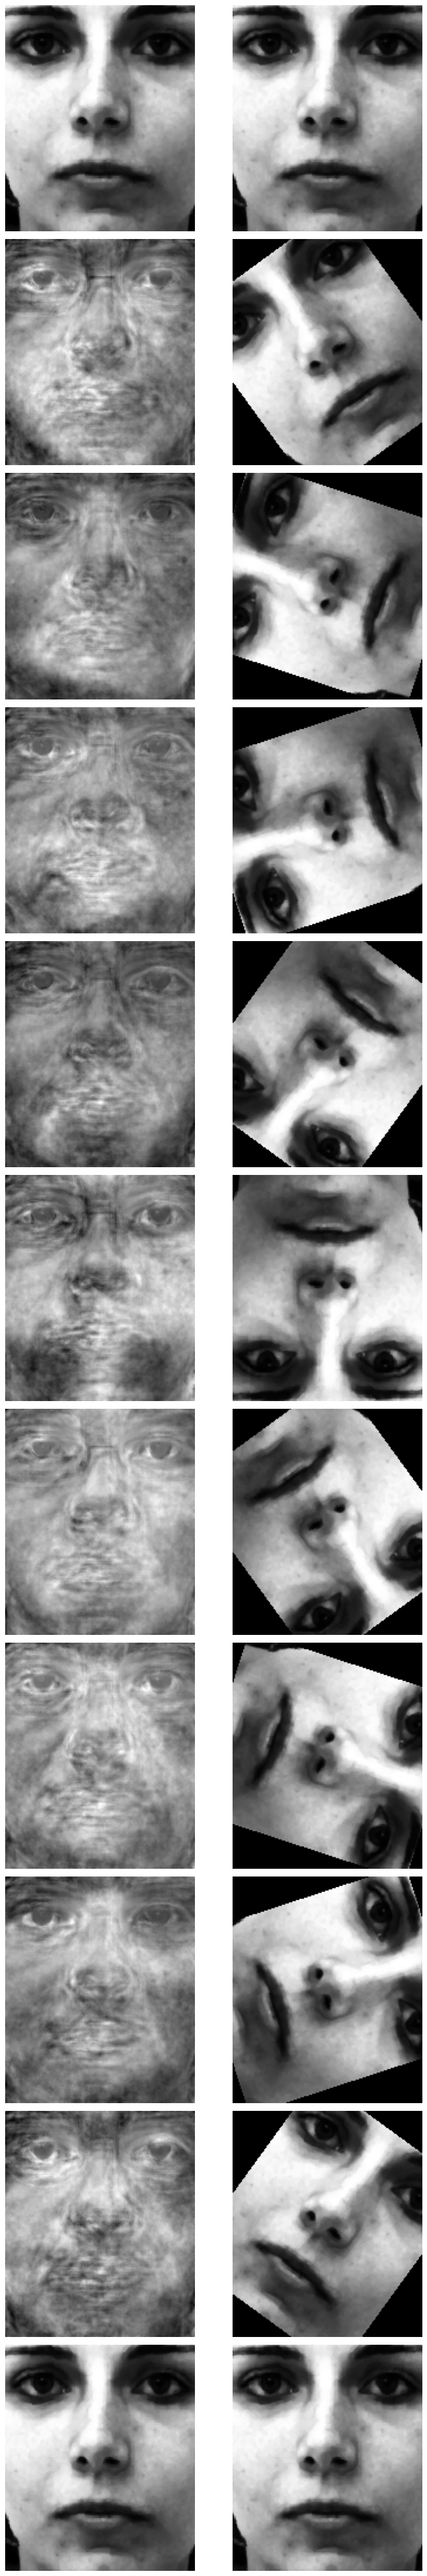

In [129]:
from scipy import ndimage

img_num = random.randint(1, 191)
img = images_n[img_num]
degrees = list(range(0, 361))
mse_list = []
for degree in degrees:
    rotated = ndimage.rotate(img, degree, reshape=False)
    rec, mse = reconstruct_image(rotated, u)
    mse_list.append(mse)

plt.plot(mse_list)

rows = 11
columns = 2
fig = plt.figure(figsize=(10, 50))
rot_list = list(range(0, 361, 36))
i = 1

for degree in rot_list:
    rotated = ndimage.rotate(img, degree, reshape=False)
    rec, mse = reconstruct_image(rotated, u)

    ax1 = fig.add_subplot(rows, columns, i)
    ax1.imshow(rec.reshape((193, 162)), cmap="gray")
    ax1.axis("off")

    ax2 = fig.add_subplot(rows, columns, i + 1)
    ax2.imshow(rotated, cmap="gray")
    ax2.axis("off")

    i += 2

plt.tight_layout()
plt.show()

# Same result! the model can not recognize the rotated faces.

## Face Recognition (10 point)

In [136]:
coeffients = []
X = u[:, :10]
for i in range(OBSERVATION):
    coeffients.append(X.T @ gamma_v[:,i])
coeffients = np.array(coeffients).T

def pearson(v1: np.ndarray, v2: np.ndarray):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

def recognition(img, coeffients, threshold=0.8):
    c = np.dot(X.T, img)
    for i in range(OBSERVATION):
        cos_theta = pearson(c, coeffients[:, i])
        if cos_theta > threshold:
            print("Recognition successful")
            return True
    print(f"Recognition failed with correlation {cos_theta}")
    return False

image_list = [images_l[0].flatten(), images_n[0].flatten(), images_n[195].flatten(), images_n[195].flatten(), images_l[2].flatten(), images_n[2].flatten()]

for img in image_list:
    recognition(img, coeffients)

Recognition successful
Recognition successful
Recognition failed with correlation 0.24088978962539315
Recognition failed with correlation 0.24088978962539315
Recognition successful
Recognition successful
